In [97]:
import numpy as np
import pandas as pd
import openpyxl

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from pycaret.regression import *
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, Lars
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


In [98]:
df = pd.read_excel('Largest Companies in the World.xlsx')
df.head()

,Global Rank,Company,Sales ($billion),Profits ($billion),Assets ($billion),Market Value ($billion),Country,Continent,Latitude,Longitude
0,1,ICBC,134.8,37.8,2813.5,237.3,China,Asia,35.86166,104.195397
1,2,China Construction Bank,113.1,30.6,2241.0,202.0,China,Asia,35.86166,104.195397
2,3,JPMorgan Chase,108.2,21.3,2359.1,191.4,USA,North America,37.09024,-95.712891
3,4,General Electric,147.4,13.6,685.3,243.7,USA,North America,37.09024,-95.712891
4,5,Exxon Mobil,420.7,44.9,333.8,400.4,USA,North America,37.09024,-95.712891


In [99]:
df.shape

(1924, 10)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924 entries, 0 to 1923
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Global Rank              1924 non-null   int64  
 1   Company                  1924 non-null   object 
 2   Sales ($billion)         1924 non-null   float64
 3   Profits ($billion)       1924 non-null   float64
 4   Assets ($billion)        1924 non-null   float64
 5   Market Value ($billion)  1924 non-null   float64
 6   Country                  1924 non-null   object 
 7   Continent                1924 non-null   object 
 8   Latitude                 1924 non-null   float64
 9   Longitude                1924 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 150.4+ KB


In [101]:
df1 = df.copy()

In [102]:
df1.isnull().sum()

Global Rank                0
Company                    0
Sales ($billion)           0
Profits ($billion)         0
Assets ($billion)          0
Market Value ($billion)    0
Country                    0
Continent                  0
Latitude                   0
Longitude                  0
dtype: int64

In [103]:
df1.rename(columns = {"Global Rank":"rank","Sales ($billion)":"Sales_bill","Profits ($billion)":"profits_bill","Assets ($billion)":"assets_bill","Market Value ($billion)":"market_value_bill"},inplace =True)
df1.columns

Index(['rank', 'Company', 'Sales_bill', 'profits_bill', 'assets_bill',
       'market_value_bill', 'Country', 'Continent', 'Latitude', 'Longitude'],
      dtype='object')

In [104]:
df1.isna().sum()

rank                 0
Company              0
Sales_bill           0
profits_bill         0
assets_bill          0
market_value_bill    0
Country              0
Continent            0
Latitude             0
Longitude            0
dtype: int64

In [105]:
df2 = df.copy()

In [106]:
s = setup(df2, target = df2['Market Value ($billion)'], session_id = 123)

,Description,Value
0,Session id,123
1,Target,Market Value ($billion)_y
2,Target type,Regression
3,Original data shape,"(1924, 11)"
4,Transformed data shape,"(1924, 16)"
5,Transformed train set shape,"(1346, 16)"
6,Transformed test set shape,"(578, 16)"
7,Numeric features,7
8,Categorical features,3
9,Preprocess,True


In [107]:
# compare baseline models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,0.0190,0.0016,0.0374,1.0000,0.0026,0.0025,0.0280
lar,Least Angle Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0240
llar,Lasso Least Angle Regression,0.0190,0.0016,0.0375,1.0000,0.0026,0.0026,0.0220
en,Elastic Net,0.0206,0.0018,0.0396,1.0000,0.0030,0.0028,0.0240
huber,Huber Regressor,0.1941,0.1077,0.3093,0.9999,0.0399,0.0353,0.0270
par,Passive Aggressive Regressor,0.2922,0.1770,0.3789,0.9998,0.0661,0.0746,0.0240
ridge,Ridge Regression,0.2765,0.2729,0.5085,0.9997,0.0501,0.0568,0.0230
br,Bayesian Ridge,0.2526,0.2493,0.4609,0.9997,0.0460,0.0529,0.0240
lr,Linear Regression,0.2764,0.2729,0.5085,0.9997,0.0501,0.0568,0.4920
knn,K Neighbors Regressor,6.1939,207.3462,13.8131,0.7783,0.4651,0.6982,0.0250


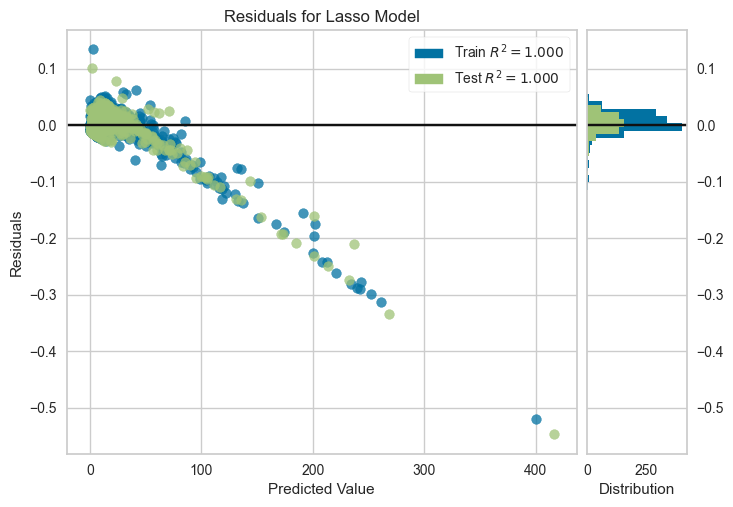

In [108]:
# plot residuals
plot_model(best, plot = 'residuals')

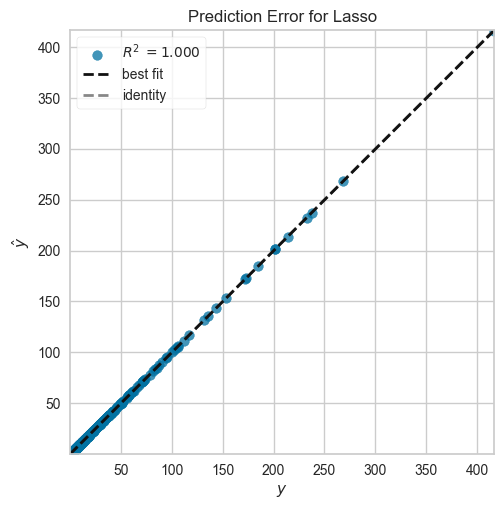

In [109]:
# plot error
plot_model(best, plot = 'error')

# Prediction

In [110]:
# predict on test set
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Regression,0.0204,0.0019,0.0441,1.0000,0.0028,0.0021


In [111]:
# show predictions df2
holdout_pred.head()

,Global Rank,Company,Sales ($billion),Profits ($billion),Assets ($billion),Market Value ($billion)_x,Country,Continent,Latitude,Longitude,Market Value ($billion)_y,prediction_label
1058,1099,Intuit,4.200000,0.8,5.100000,19.400000,USA,North America,37.090240,-95.712891,19.400000,19.393616
437,457,Praxair,11.200000,1.7,18.100000,33.599998,USA,North America,37.090240,-95.712891,33.599998,33.596871
1149,1191,Greentown China Holdings,5.600000,0.8,17.299999,3.200000,China,Asia,35.861660,104.195396,3.200000,3.214441
546,567,Quanta Computer,34.400002,0.8,24.600000,8.500000,Taiwan,Asia,23.697809,120.960518,8.500000,8.530010
657,682,NKSJ Holdings,30.900000,-1.1,105.199997,9.400000,Japan,Asia,36.204823,138.252930,9.400000,9.426600


Hyperparameter Tuning of best model from pycaret module

In [112]:
lasso = create_model('lasso')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0208,0.0018,0.0419,1.0000,0.0020,0.0017
1,0.0201,0.0011,0.0336,1.0000,0.0022,0.0023
2,0.0144,0.0005,0.0227,1.0000,0.0020,0.0021
3,0.0296,0.0055,0.0743,1.0000,0.0023,0.0023
4,0.0150,0.0006,0.0244,1.0000,0.0021,0.0021
5,0.0170,0.0010,0.0321,1.0000,0.0045,0.0026
6,0.0172,0.0011,0.0325,1.0000,0.0042,0.0063
7,0.0183,0.0012,0.0351,1.0000,0.0025,0.0021
8,0.0175,0.0012,0.0341,1.0000,0.0020,0.0020


In [113]:
# tune hyperparameters of lasso
tuned_lasso = tune_model(lasso)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0112,0.0005,0.0226,1.0000,0.0011,0.0009
1,0.0107,0.0003,0.0180,1.0000,0.0012,0.0012
2,0.0077,0.0001,0.0122,1.0000,0.0011,0.0011
3,0.0159,0.0016,0.0400,1.0000,0.0012,0.0012
4,0.0081,0.0002,0.0132,1.0000,0.0012,0.0011
5,0.0091,0.0003,0.0173,1.0000,0.0024,0.0014
6,0.0092,0.0003,0.0175,1.0000,0.0023,0.0034
7,0.0098,0.0004,0.0189,1.0000,0.0013,0.0011
8,0.0095,0.0003,0.0184,1.0000,0.0011,0.0011


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [114]:

# to access the tuner object you can set return_tuner = True
tuned_lasso, tuner = tune_model(lasso, return_tuner=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0112,0.0005,0.0226,1.0000,0.0011,0.0009
1,0.0107,0.0003,0.0180,1.0000,0.0012,0.0012
2,0.0077,0.0001,0.0122,1.0000,0.0011,0.0011
3,0.0159,0.0016,0.0400,1.0000,0.0012,0.0012
4,0.0081,0.0002,0.0132,1.0000,0.0012,0.0011
5,0.0091,0.0003,0.0173,1.0000,0.0024,0.0014
6,0.0092,0.0003,0.0175,1.0000,0.0023,0.0034
7,0.0098,0.0004,0.0189,1.0000,0.0013,0.0011
8,0.0095,0.0003,0.0184,1.0000,0.0011,0.0011


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [115]:
# model object
tuned_lasso

Lasso(random_state=123)

# Testing

In [116]:
def preprocess(df):
    
    df = df.copy()
    
    # Drop unused columns
    df = df.drop(['Global Rank', 'Company','Continent','Latitude','Longitude',], axis=1)
    
    # One-hot encode Categorical feature columns
    le = LabelEncoder()
    df['Country'] = le.fit_transform(df['Country'])
    
    # Split df into X and y
    y = df['Market Value ($billion)']
    X = df.drop('Market Value ($billion)', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = preprocess(df)



In [117]:
model_lasso = Lasso(random_state=123)
model_lasso.fit(X_train,y_train)
pred_lasso = model.predict(X_test)

In [118]:
model_compare_lasso = pd.DataFrame({'y_test': y_test, 'lasso_pred': pred_lasso})
model_compare_lasso

,y_test,lasso_pred
48,87.2,83.351886
1279,11.5,12.567776
1159,4.7,5.101018
1089,10.2,15.537020
309,10.2,23.124774
...,...,...
654,13.6,16.387662
1318,0.9,11.984960
142,58.0,103.590638
1693,1.0,9.112356


Lasso model does not have high accuracy. Therefore, i will test score against other models using manual techniques.

In [119]:
models = {
    "                     Linear Regression": LinearRegression(),
    " Linear Regression (L2 Regularization)": Ridge(),
    " Linear Regression (L1 Regularization)": Lasso(),
    "                Least Angle Regression": Lars(n_nonzero_coefs=1),   
    "                   K-Nearest Neighbors": KNeighborsRegressor(),
    "                        Neural Network": MLPRegressor(),
    "                         Decision Tree": DecisionTreeRegressor(),
    "                         Random Forest": RandomForestRegressor(),
    "                     Gradient Boosting": GradientBoostingRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                     Linear Regression trained.
 Linear Regression (L2 Regularization) trained.
 Linear Regression (L1 Regularization) trained.
                Least Angle Regression trained.
                   K-Nearest Neighbors trained.
                        Neural Network trained.
                         Decision Tree trained.
                         Random Forest trained.
                     Gradient Boosting trained.


In [120]:
for name, model in models.items():
    r2 = model.score(X_test, y_test)
    print(name + " R^2: {:.4f}".format(r2))

                     Linear Regression R^2: 0.6349
 Linear Regression (L2 Regularization) R^2: 0.6349
 Linear Regression (L1 Regularization) R^2: 0.6363
                Least Angle Regression R^2: 0.1643
                   K-Nearest Neighbors R^2: 0.5064
                        Neural Network R^2: 0.6632
                         Decision Tree R^2: 0.4910
                         Random Forest R^2: 0.6235
                     Gradient Boosting R^2: 0.6824


Choosing Gradient Bossting Regressor as the model for testing, because it has the best score.

In [121]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    rmse = np.sqrt(np.mean((y_test - y_pred)**2))
    print(name + " RMSE: {:.2f}".format(rmse))

                     Linear Regression RMSE: 20.12
 Linear Regression (L2 Regularization) RMSE: 20.12
 Linear Regression (L1 Regularization) RMSE: 20.08
                Least Angle Regression RMSE: 30.44
                   K-Nearest Neighbors RMSE: 23.40
                        Neural Network RMSE: 19.33
                         Decision Tree RMSE: 23.76
                         Random Forest RMSE: 20.43
                     Gradient Boosting RMSE: 18.77


Gradient Boosting regressor has the best score.

In [122]:
model_gb = GradientBoostingRegressor()
model_gb.fit(X_train,y_train)
pred_gb = model_gb.predict(X_test)

Comparing against target data.

In [123]:
model_compare_gb = pd.DataFrame({'y_test': y_test, 'gb_pred': pred_gb})
model_compare_gb

,y_test,gb_pred
48,87.2,83.351886
1279,11.5,12.567776
1159,4.7,5.101018
1089,10.2,15.537020
309,10.2,23.124774
...,...,...
654,13.6,16.387662
1318,0.9,11.984960
142,58.0,103.590638
1693,1.0,9.112356


It seems with all the testing and model scores that the Gradient Boosting Regressor is the best model.

# Cross Validation for Hyperparameter Tuning of the best model

In [124]:
cv_model = model_gb

In [125]:
cv_comparison = pd.DataFrame({'cv': [2,3,4,5,6,7,8,9,10],'mean_cross_val_score': [np.mean(cross_val_score(cv_model, X_train, y_train, cv=2))
                                                                                 ,np.mean(cross_val_score(cv_model, X_train, y_train, cv=3))
                                                                                 ,np.mean(cross_val_score(cv_model, X_train, y_train, cv=4))
                                                                                 ,np.mean(cross_val_score(cv_model, X_train, y_train, cv=5))
                                                                                 ,np.mean(cross_val_score(cv_model, X_train, y_train, cv=6))
                                                                                 ,np.mean(cross_val_score(cv_model, X_train, y_train, cv=7))
                                                                                 ,np.mean(cross_val_score(cv_model, X_train, y_train, cv=8))
                                                                                 ,np.mean(cross_val_score(cv_model, X_train, y_train, cv=9))
                                                                                 ,np.mean(cross_val_score(cv_model, X_train, y_train, cv=10))]})
cv_comparison.sort_values(by = ['mean_cross_val_score'],ascending =False)

,cv,mean_cross_val_score
2,4,0.809063
1,3,0.799649
7,9,0.798494
5,7,0.795293
3,5,0.793259
4,6,0.790074
8,10,0.786592
6,8,0.763657
0,2,0.761445


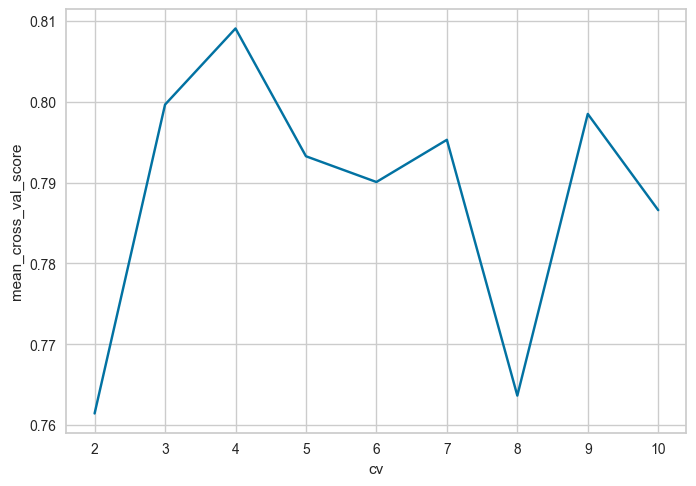

In [126]:
sns.lineplot(x=cv_comparison['cv'],y=cv_comparison['mean_cross_val_score'])
plt.show()

In [127]:
print('The max mean cross validation is ' + str(cv_comparison.sort_values(by = ['mean_cross_val_score'],ascending =False).iloc[0,1]) + 'found at cv ='+str(cv_comparison.sort_values(by = ['mean_cross_val_score'],ascending =False).iloc[0,0]) + '.')

The max mean cross validation is 0.8090630824253966found at cv =4.


# Hyperparameter tuning (code has been commented out to save time)

In [130]:

param_grid = {'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1],'max_depth':[1,2,4],'subsample':[.5,.75,1],'random_state':[1]}

CV_model = GridSearchCV(estimator=cv_model, param_grid=param_grid, cv= cv_comparison.sort_values(by = ['mean_cross_val_score'],ascending =False).iloc[0,0])
CV_model.fit(X_train, y_train)
     
CV_model.best_params_

{'learning_rate': 0.01,
 'max_depth': 4,
 'n_estimators': 1000,
 'random_state': 1,
 'subsample': 1}

The best model with best parameters is GradientBoostingRegressor(learning_rate= 0.01,
 max_depth= 4,
 n_estimators= 1000,
 random_state= 1,
 subsample= 1)

In [134]:
from sklearn.metrics import r2_score

In [135]:
final_model = GradientBoostingRegressor(learning_rate= 0.01,
 max_depth= 4,
 n_estimators= 1000,
 random_state= 1,
 subsample= 1)
final_model.fit(X_train,y_train)
final_model.score(X_test, y_test)


0.6464124205193256

Continuing with the default model as it has the better score.